# Imports

In [1541]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize, label_binarize
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Neural network module
import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense, Input, Dropout
from keras.utils import to_categorical


from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Special variables

In [1542]:
normal_model_acc            = 0
quantizde_weights_model_acc = 0
fully_quantized_model_acc   = 0


# Dataset Analysis

In [1543]:

# Load the iris dataset
iris = load_iris()

# Check the feature names (sepal length, sepal width, petal length, petal width)
print("Feature names:", iris.feature_names)

# Check the target names (the species of the iris)
print("Target names (species):", iris.target_names)

# Check the first 5 samples of feature data (numerical values)
print("First 5 samples of feature data:\n", iris.data[:5])

# Check the first 5 labels (encoded as 0, 1, or 2 for each species)
print("First 5 target labels (species):\n", iris.target[:5])



Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names (species): ['setosa' 'versicolor' 'virginica']
First 5 samples of feature data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 target labels (species):
 [0 0 0 0 0]


In [1544]:
# Total number of samples
total_samples = iris.data.shape[0]

# Total number of features (sepal length, sepal width, etc.)
total_features = iris.data.shape[1]

# Total number of classes
total_classes = len(np.unique(iris.target))

# Minimum and maximum values for each feature
min_values = np.min(iris.data, axis=0)
max_values = np.max(iris.data, axis=0)

# Mean and standard deviation for each feature
mean_values = np.mean(iris.data, axis=0)
std_values = np.std(iris.data, axis=0)

# Class distribution (how many samples per class)
unique, counts = np.unique(iris.target, return_counts=True)
class_distribution = dict(zip(iris.target_names, counts))

# Display the results
print(f"Total number of samples: {total_samples}")
print(f"Total number of features: {total_features}")
print(f"Total number of classes: {total_classes}\n")

print("Minimum values for each feature:")
for feature_name, min_val in zip(iris.feature_names, min_values):
    print(f"{feature_name}: {min_val}")

print("\nMaximum values for each feature:")
for feature_name, max_val in zip(iris.feature_names, max_values):
    print(f"{feature_name}: {max_val}")

print("\nMean values for each feature:")
for feature_name, mean_val in zip(iris.feature_names, mean_values):
    print(f"{feature_name}: {mean_val:.2f}")

print("\nStandard deviation for each feature:")
for feature_name, std_val in zip(iris.feature_names, std_values):
    print(f"{feature_name}: {std_val:.2f}")

print("\nClass distribution:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count} samples")

Total number of samples: 150
Total number of features: 4
Total number of classes: 3

Minimum values for each feature:
sepal length (cm): 4.3
sepal width (cm): 2.0
petal length (cm): 1.0
petal width (cm): 0.1

Maximum values for each feature:
sepal length (cm): 7.9
sepal width (cm): 4.4
petal length (cm): 6.9
petal width (cm): 2.5

Mean values for each feature:
sepal length (cm): 5.84
sepal width (cm): 3.06
petal length (cm): 3.76
petal width (cm): 1.20

Standard deviation for each feature:
sepal length (cm): 0.83
sepal width (cm): 0.43
petal length (cm): 1.76
petal width (cm): 0.76

Class distribution:
setosa: 50 samples
versicolor: 50 samples
virginica: 50 samples


# Dataset Normalization (L2 Norm)

In [1545]:
# Create X (features) and Y (target) vectors
X = iris.data  # This is the feature matrix
y = iris.target  # This is the target vector (species)

# Normalize X using L2 norm (default)
X_normalized = normalize(X)

# Display the first 5 samples of X (normalized) and Y
print("First 5 normalized samples of X:\n", X_normalized[:5])
print("\nFirst 5 samples of y (target):\n", y[:5])

First 5 normalized samples of X:
 [[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]]

First 5 samples of y (target):
 [0 0 0 0 0]


In [1546]:
# Minimum and maximum values for each feature normalized
min_values = np.min(X_normalized, axis=0)
max_values = np.max(X_normalized, axis=0)

# Mean and standard deviation for each feature normalized
mean_values = np.mean(X_normalized, axis=0)
std_values = np.std(X_normalized, axis=0)

print("Minimum values for each feature normalized:")
for feature_name, min_val in zip(iris.feature_names, min_values):
    print(f"{feature_name}: {min_val}")

print("\nMaximum values for each feature normalized:")
for feature_name, max_val in zip(iris.feature_names, max_values):
    print(f"{feature_name}: {max_val}")

print("\nMean values for each feature normalized:")
for feature_name, mean_val in zip(iris.feature_names, mean_values):
    print(f"{feature_name}: {mean_val:.2f}")

print("\nStandard deviation for each feature normalized:")
for feature_name, std_val in zip(iris.feature_names, std_values):
    print(f"{feature_name}: {std_val:.2f}")

Minimum values for each feature normalized:
sepal length (cm): 0.6538774709871312
sepal width (cm): 0.23839169677842428
petal length (cm): 0.16783627165933782
petal width (cm): 0.014726598240177802

Maximum values for each feature normalized:
sepal length (cm): 0.8609385732675535
sepal width (cm): 0.6071249316193964
petal length (cm): 0.6369808460748799
petal width (cm): 0.28041899416175325

Mean values for each feature normalized:
sepal length (cm): 0.75
sepal width (cm): 0.41
petal length (cm): 0.45
petal width (cm): 0.14

Standard deviation for each feature normalized:
sepal length (cm): 0.04
sepal width (cm): 0.11
petal length (cm): 0.16
petal width (cm): 0.08


# Input Data Quantization

Input data is quantized to int8 using:

```math
\hat{X} = clamp\left\{round\left(\frac{X}{s}\right) + z; min(quant), max(quant)\right\}
```

where: 

```math
s = \frac{max(X) -min(X)}{max(quant) -min(quant)} 
```

and: 

```math
z = round\left(\frac{0-min(X)}{s}\right)
```

Quant is the quantization space in 8 signed bits ints -> -128 to 127

In [1547]:
# Function to calculate scale and zero point for input quantization
def calculate_scale_and_zero_point_input(X, quant_min=-128, quant_max=127):
    # Find the min and max of the normalized input data
    X_min = np.min(X)
    X_max = np.max(X)
    
    # Calculate scale
    scale = (X_max - X_min) / (quant_max - quant_min)
    
    # Calculate zero point (shift to map 0 in X to the quantized range)
    zero_point = np.round(quant_min - X_min / scale).astype(int)
    
    return scale, zero_point

# Function to quantize inputs
def quantize_input(X, scale, zero_point, quant_min=-128, quant_max=127):
    # Quantize the input using the scale and zero point
    quantized_X = np.round(X / scale + zero_point)
    
    # Clip values to be within the range [quant_min, quant_max]
    quantized_X = np.clip(quantized_X, quant_min, quant_max).astype(int)
    
    return quantized_X

# Calculate scale and zero point for the input
input_scale, input_zero_point = calculate_scale_and_zero_point_input(X_normalized)

# Quantize the normalized input data
X_normalized_scaled = quantize_input(X_normalized, input_scale, input_zero_point)

# Print first 5 quantized input samples
print("First 5 quantized and scaled samples of X:\n", X_normalized_scaled[:5])


First 5 quantized and scaled samples of X:
 [[ 110   34  -66 -123]
 [ 118   21  -61 -122]
 [ 111   33  -65 -122]
 [ 109   30  -53 -122]
 [ 106   40  -65 -122]]


In [1548]:
# Minimum and maximum values for each feature normalized and scaled
min_values = np.min(X_normalized_scaled, axis=0)
max_values = np.max(X_normalized_scaled, axis=0)

# Mean and standard deviation for each feature normalized and scaled
mean_values = np.mean(X_normalized_scaled, axis=0)
std_values = np.std(X_normalized_scaled, axis=0)

print("Minimum values for each feature normalized and scaled:")
for feature_name, min_val in zip(iris.feature_names, min_values):
    print(f"{feature_name}: {min_val}")

print("\nMaximum values for each feature normalized and scaled:")
for feature_name, max_val in zip(iris.feature_names, max_values):
    print(f"{feature_name}: {max_val}")

print("\nMean values for each feature normalized and scaled:")
for feature_name, mean_val in zip(iris.feature_names, mean_values):
    print(f"{feature_name}: {mean_val:.2f}")

print("\nStandard deviation for each feature normalized and scaled:")
for feature_name, std_val in zip(iris.feature_names, std_values):
    print(f"{feature_name}: {std_val:.2f}")

Minimum values for each feature normalized and scaled:
sepal length (cm): 65
sepal width (cm): -60
petal length (cm): -81
petal width (cm): -128

Maximum values for each feature normalized and scaled:
sepal length (cm): 127
sepal width (cm): 51
petal length (cm): 60
petal width (cm): -47

Mean values for each feature normalized and scaled:
sepal length (cm): 94.45
sepal width (cm): -9.91
petal length (cm): 5.10
petal width (cm): -89.50

Standard deviation for each feature normalized and scaled:
sepal length (cm): 13.32
sepal width (cm): 31.74
petal length (cm): 48.07
petal width (cm): 23.45


# Dataset partitioning (Test and Train)

In [1549]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized_scaled, y, test_size=0.2, stratify=y, random_state=11)

# Count the number of entries for each class in the train and test sets before one-hot encoding
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("Class distribution in y_train:")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls}: {count} entries")

print("\nClass distribution in y_test:")
for cls, count in zip(unique_test, counts_test):
    print(f"Class {cls}: {count} entries")

# Change the labels to one-hot vectors
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Print the shape of the one-hot encoded labels
print("\nShape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Class distribution in y_train:
Class 0: 40 entries
Class 1: 40 entries
Class 2: 40 entries

Class distribution in y_test:
Class 0: 10 entries
Class 1: 10 entries
Class 2: 10 entries

Shape of y_train: (120, 3)
Shape of y_test: (30, 3)


# Neural Network Architecture

In [1550]:
# Define the model
model = Sequential()

# Input layer and first hidden layer
model.add(Input(shape=(4,)))
model.add(Dense(8, activation='relu'))

# Second hidden layer
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [1551]:
model.summary()

Model: "sequential_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_416 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_417 (Dense)               │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_418 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [1552]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5044 - loss: 4.4605 - val_accuracy: 0.6667 - val_loss: 1.4047
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7093 - loss: 1.0608 - val_accuracy: 1.0000 - val_loss: 0.1112
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9076 - loss: 0.2886 - val_accuracy: 0.9667 - val_loss: 0.1447
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8913 - loss: 0.3556 - val_accuracy: 0.9333 - val_loss: 0.2029
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9252 - loss: 0.2054 - val_accuracy: 0.9333 - val_loss: 0.1853
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9156 - loss: 0.2154 - val_accuracy: 0.9667 - val_loss: 0.1014
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9686 - loss: 0.1235 - val_accuracy: 1.0000 - val_loss: 0.0389
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9802 - loss: 0.0839 - val_accuracy: 1.0000 - val_loss: 0.0474
Epoch 9/10
6/6

# Model Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Accuracy of the dataset: 100.00%


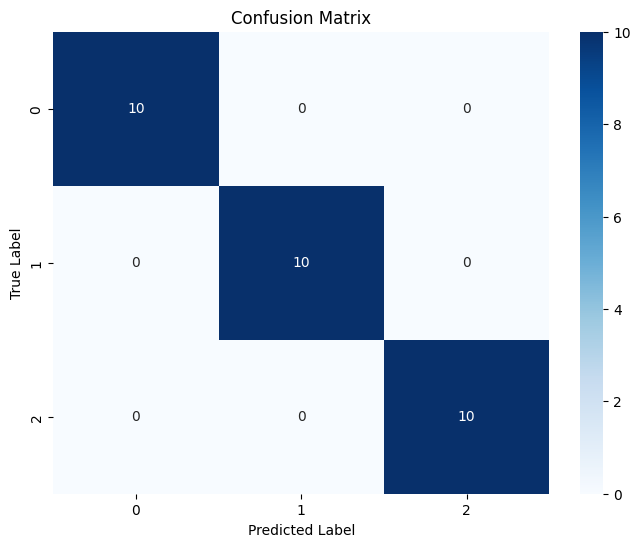

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        10
     Class 1       1.00      1.00      1.00        10
     Class 2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



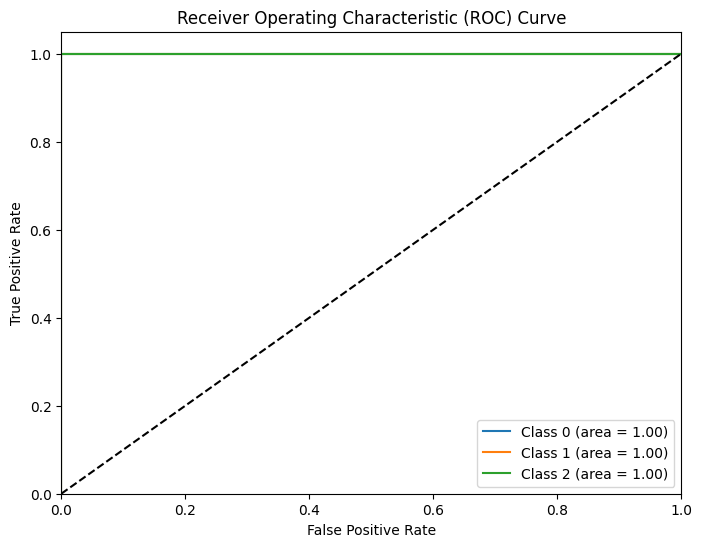

In [1553]:
# Predict on test data
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.sum(y_true == y_pred) / len(y_true) * 100
normal_model_acc = accuracy
print("Accuracy of the dataset: {:.2f}%".format(accuracy))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=[f'Class {i}' for i in range(3)])
print("Classification Report:\n", report)

# ROC Curve and AUC
# Binarize the output for ROC curve
y_test_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_prob = predictions  # Probability predictions

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [1554]:
model.save_weights('model.weights.h5')

In [1555]:
for layer in model.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}")
    if weights:
        print("Weights:")
        print(weights[0])  # Print weights matrix
        if len(weights) > 1:
            print("Biases:")
            print(weights[1])  # Print biases vector
    else:
        print("No weights for this layer.")


Layer: dense_416
Weights:
[[ 5.5708253e-01  2.6219887e-01  1.0292590e-02 -6.8225408e-01
  -6.5194511e-01 -5.7299030e-01  6.1769575e-01 -5.4636657e-02]
 [ 6.3964677e-01  9.4875760e-02  1.0915917e-01 -6.3997999e-02
  -2.3433310e-01  4.5631200e-01  4.5490751e-01  2.5888330e-01]
 [-1.8358274e-01 -7.6074755e-01 -1.3235390e-01  3.5617998e-01
  -9.0708137e-02 -6.5767765e-04  8.1858414e-01 -4.7030300e-01]
 [-3.2975426e-01 -2.6287669e-01  2.9537672e-01 -3.2028696e-01
  -2.9845363e-01  6.1271769e-01  2.4440037e-01  7.0620376e-01]]
Biases:
[-0.1395569  -0.10240715  0.         -0.10032868  0.          0.
  0.11889838  0.        ]
Layer: dense_417
Weights:
[[ 0.367851   -0.41242862 -0.36930466  0.19517599 -0.21242334  0.6140372
  -0.24916609 -0.2615244 ]
 [ 0.3891702  -0.01801015 -0.23124832 -0.56863666  0.6182783   0.27921236
   0.52437794  0.24019945]
 [ 0.49766475 -0.02702945 -0.3364712   0.32469285 -0.0989126  -0.32953689
  -0.23119429 -0.04720956]
 [ 0.43509036 -0.30186522 -0.4825456   0.00217

# Model Weight Quantization

Weight data is quantized to int8 the same way inputs are quantized, but its quantization is specific to each layer i:

```math
\hat{W_i} = clamp\left\{round\left(\frac{W_i}{s_i}\right) + z_i; min(quant), max(quant)\right\}
```

where: 

```math
s_i = \frac{max(W_i) -min(W_i)}{max(quant) -min(quant)} 
```

and: 

```math
z_i = round\left(\frac{0-min(W_i)}{s_i}\right) 
```

Quant is the quantization space in 8 signed bits ints -> -128 to 127


In [1556]:
# Function to calculate the scale and zero point
def calculate_scale_and_zero_point(weights, quant_min=-128, quant_max=127):
    min_weight = np.min(weights)
    max_weight = np.max(weights)
    
    # Calculate the scale and zero point
    scale = (max_weight - min_weight) / (quant_max - quant_min)
    zero_point = np.round(quant_min - min_weight / scale).astype(int)
    
    return scale, zero_point

# Function to quantize weights using scale and zero point
def quantize_weights(weights, scale, zero_point, quant_min=-128, quant_max=127):
    # Quantize weights using the calculated scale and zero point
    quantized_weights = np.round(weights / scale + zero_point)
    
    # Clip values to be within the quantization range
    quantized_weights = np.clip(quantized_weights, quant_min, quant_max).astype(int)
    
    return quantized_weights

# Function to scale and quantize the weights of the model
def quantize_model_weights(model):
    for layer in model.layers:
        if isinstance(layer, Dense):
            # Get the current weights and biases
            weights, biases = layer.get_weights()
            
            # Calculate scale and zero point for weights
            weight_scale, weight_zero_point = calculate_scale_and_zero_point(weights)
            bias_scale, bias_zero_point = calculate_scale_and_zero_point(biases)
            
            # Quantize weights and biases
            quantized_weights = quantize_weights(weights, weight_scale, weight_zero_point)
            quantized_biases = quantize_weights(biases, bias_scale, bias_zero_point)
            
            # Set the quantized weights and biases back to the layer
            layer.set_weights([quantized_weights, quantized_biases])
            
            # Print quantization details for debugging
            print(f'Layer: {layer.name} - Weights quantized with scale {weight_scale:.6f} and zero point {weight_zero_point}.')
            print(f'Layer: {layer.name} - Biases quantized with scale {bias_scale:.6f} and zero point {bias_zero_point}.')
    
# Apply the quantization to the model
quantize_model_weights(model)



Layer: dense_416 - Weights quantized with scale 0.006193 and zero point -5.
Layer: dense_416 - Biases quantized with scale 0.001014 and zero point 10.
Layer: dense_417 - Weights quantized with scale 0.004733 and zero point -4.
Layer: dense_417 - Biases quantized with scale 0.000842 and zero point 18.
Layer: dense_418 - Weights quantized with scale 0.004866 and zero point 25.
Layer: dense_418 - Biases quantized with scale 0.001397 and zero point 6.


In [1557]:
for layer in model.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}")
    if weights:
        print("Weights:")
        print(weights[0])  # Print weights matrix
        if len(weights) > 1:
            print("Biases:")
            print(weights[1])  # Print biases vector
    else:
        print("No weights for this layer.")

Layer: dense_416
Weights:
[[  85.   37.   -3. -115. -110.  -98.   95.  -14.]
 [  98.   10.   13.  -15.  -43.   69.   68.   37.]
 [ -35. -128.  -26.   53.  -20.   -5.  127.  -81.]
 [ -58.  -47.   43.  -57.  -53.   94.   34.  109.]]
Biases:
[-128.  -91.   10.  -89.   10.   10.  127.   10.]
Layer: dense_417
Weights:
[[  74.  -91.  -82.   37.  -49.  126.  -57.  -59.]
 [  78.   -8.  -53. -124.  127.   55.  107.   47.]
 [ 101.  -10.  -75.   65.  -25.  -74.  -53.  -14.]
 [  88.  -68. -106.   -4.  -16.  -80.   71.  -38.]
 [  49. -114.   32.   42.  -16. -123. -128. -118.]
 [  66.   68.   -1.  -35.   96.   70.  110.  -19.]
 [-124.   78.   19.  -51.  -61.  -98.  -79.   -9.]
 [  56.  -57. -103.   82.   88.  -37.   44.   62.]]
Biases:
[-128.   41.   18.  -23.  127.   86.  119.   15.]
Layer: dense_418
Weights:
[[  16. -110.  -90.]
 [ -51.  -96.   94.]
 [  94.  -34.  -84.]
 [-108.   47.  -70.]
 [  63. -127.   33.]
 [-128.    3.  -39.]
 [ 127. -103.  -27.]
 [-109. -119. -113.]]
Biases:
[-128.  -12.  1

# Evaluate Quantized Weights (No Activation Quantization)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Accuracy of the dataset: 100.00%


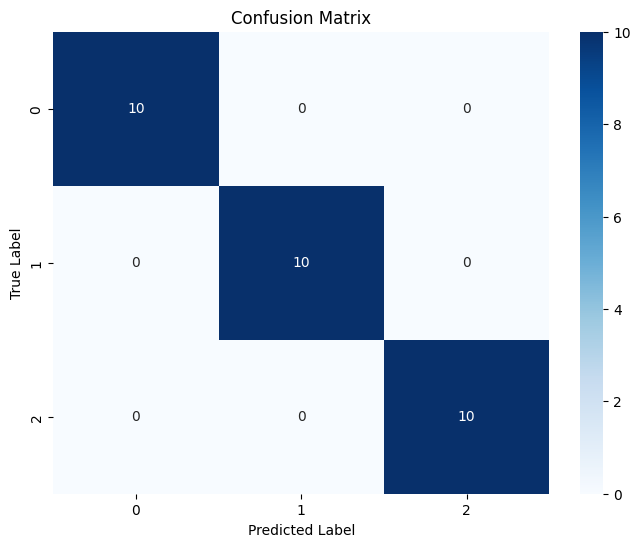

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        10
     Class 1       1.00      1.00      1.00        10
     Class 2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



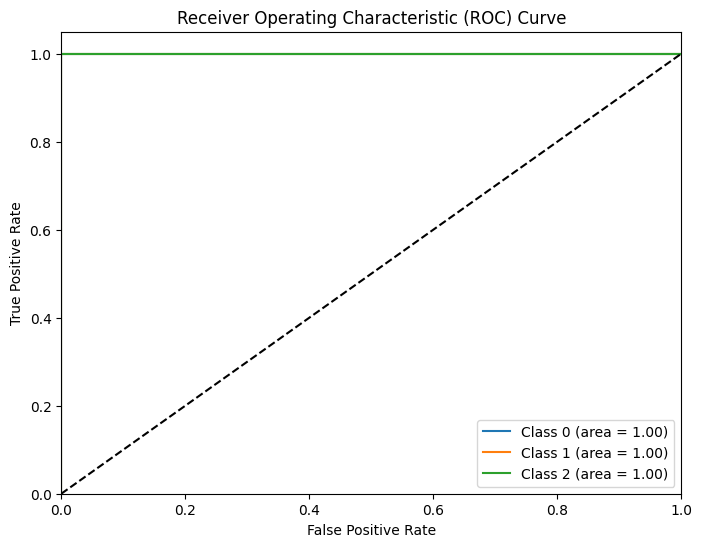

In [1558]:
# Predict on test data
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.sum(y_true == y_pred) / len(y_true) * 100
quantizde_weights_model_acc = accuracy
print("Accuracy of the dataset: {:.2f}%".format(accuracy))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=[f'Class {i}' for i in range(3)])
print("Classification Report:\n", report)

# ROC Curve and AUC
# Binarize the output for ROC curve
y_test_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_prob = predictions  # Probability predictions

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [1559]:
model.save_weights('model_scaled.weights.h5')

# Parse weights into a C array style

This is the data that has to be pre-loaded into the FPGA's memory in order to perform inference.

In [1560]:
# Open a file to write
with open("model_weights_c_style.txt", "w") as file:
    for layer in model.layers:
        weights = layer.get_weights()
        file.write("Layer: {}\n".format(layer.name))
        if weights:
            file.write("Weights:\n")
            # Write weights matrix in C-style
            weight_matrix = weights[0]
            rows, cols = weight_matrix.shape
            file.write("const short weights[{}][{}] = {{\n".format(rows, cols))
            for i, row in enumerate(weight_matrix):
                file.write("    {")
                file.write(', '.join(map(lambda x: '{:d}'.format(int(x)), row)))
                file.write("}")
                if i < rows - 1:
                    file.write(",\n")
                else:
                    file.write("\n")
            file.write("};\n\n")

            if len(weights) > 1:
                file.write("Biases:\n")
                # Write biases vector in C-style
                biases = weights[1]
                file.write("const short biases[{}] = {{\n".format(len(biases)))
                file.write(', '.join(map(lambda x: '{:d}'.format(int(x)), biases)))
                file.write("\n};\n\n")

# Sanity Checks

Looking for odd non int8 values

In [1561]:
prueba =  [ [ 110,   34,  -66, -123],
            [ 118,   21,  -61, -122],
            [ 111,   33,  -65, -122],
            [ 109,   30,  -53, -122],
            [ 106,   40,  -65, -122]]

prueba = np.array(prueba)
predictions = model.predict(prueba)

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [1562]:
extractor = keras.Model(inputs=model.inputs,
                        outputs=[layer.output for layer in model.layers])
features = extractor(prueba)

print(features)

[<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[21998., 18548.,     0.,     0.,     0.,     0.,   325.,     0.],
       [21171., 18027.,     0.,     0.,     0.,     0.,   870.,     0.],
       [21892., 18400.,     0.,     0.,     0.,     0.,   513.,     0.],
       [21008., 16760.,     0.,     0.,     0.,     0.,  1643.,     0.],
       [22153., 18285.,     0.,     0.,     0.,     0.,   514.,     0.]],
      dtype=float32)>, <tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[3034168.,       0.,       0.,       0., 1257996., 3760124.,
         705194.,       0.],
       [2864752.,       0.,       0.,       0., 1199107., 3573857.,
         653531.,       0.],
       [2991468.,       0.,       0.,       0., 1232926., 3720204.,
         680548.,       0.],
       [2658012.,       0.,       0.,       0.,  999032., 3407880.,
         466186.,       0.],
       [3001688.,       0.,       0.,       0., 1205471., 3746667.,
         653287.,       0.]], dtype=float32)>, <tf.Tensor:

## Activation layer quantization simulation

This is a test to see the models behavoiur with the on chip quantization

In this case we are using power of 2 constrained quatinzation or a power-of-two quantizer, this is a symmetric quantization technique that restrains $$ s = 2^{-k} $$ to bring hardware effciency.

In [1719]:
# Define the custom quantized ReLU activation
def mirelu32(inputs):
    # Apply ReLU
    inputs = tf.nn.relu(inputs)
    
    # Quantize by dividing and rounding using TensorFlow operations
    inputs = tf.math.round(inputs / 32)  # TensorFlow version of rounding
    
    # Convert the tensor to integer type using TensorFlow
    inputs = tf.cast(inputs, tf.int32)
    
    return inputs

# Define the custom quantized ReLU activation
def mirelu64(inputs):
    # Apply ReLU
    inputs = tf.nn.relu(inputs)
    
    # Quantize by dividing and rounding using TensorFlow operations
    inputs = tf.math.round(inputs / 64)  # TensorFlow version of rounding
    
    # Convert the tensor to integer type using TensorFlow
    inputs = tf.cast(inputs, tf.int32)
    
    return inputs

# Define the custom quantized ReLU activation
def mirelu128(inputs):
    # Apply ReLU
    inputs = tf.nn.relu(inputs)
    
    # Quantize by dividing and rounding using TensorFlow operations
    inputs = tf.math.floor(inputs / 128)  # TensorFlow version of rounding
    
    # Convert the tensor to integer type using TensorFlow
    inputs = tf.cast(inputs, tf.int32)
    
    return inputs

# # Define the custom quantized ReLU activation
# def mirelu_quantized(inputs, quant_min=0, quant_max=255):
#     # Apply ReLU using TensorFlow
#     inputs = tf.nn.relu(inputs)

#     # # Calculate scale and zero-point using TensorFlow operations (not NumPy)
#     min_val = tf.reduce_min(inputs)  # TensorFlow version of calculating min
#     max_val = tf.reduce_max(inputs)  # TensorFlow version of calculating max

#     # max_val = (2**15)-2
#     # min_val = -(2**15)


#     # Calculate the scale and zero point
#     scale = (max_val - min_val) / (quant_max - quant_min)
#     zero_point = tf.round(quant_min - min_val / scale)

#     # Quantize the ReLU outputs
#     quantized_inputs = tf.round(inputs / scale + zero_point)

#     # Clip values to ensure they fit within the int8 range [-128, 127]
#     quantized_inputs = tf.clip_by_value(quantized_inputs, quant_min, quant_max)

#     # Convert to integer type using TensorFlow operations
#     quantized_inputs = tf.cast(quantized_inputs, tf.int32)

#     return quantized_inputs

# Define the custom quantized ReLU activation
def misoftmax(inputs):
    
    # # Find the maximum value in the inputs
    # max_value = tf.reduce_max(inputs)
    
    # # Create a mask that keeps only the max value and sets others to zero
    # outputs = tf.where(inputs == max_value, max_value, tf.zeros_like(inputs))
    
    # # Convert the tensor to integer type using TensorFlow
    # outputs = tf.cast(outputs, tf.int32)
    
    return inputs

# Create the model
model_quant = Sequential()

# Use Input layer to define the input shape
model_quant.add(Input(shape=(4,)))

# Add the rest of the layers
model_quant.add(Dense(8, activation=mirelu128))
model_quant.add(Dense(8, activation=mirelu128))
model_quant.add(Dense(3, activation=misoftmax))

# Compile the model
model_quant.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [1720]:
# Assuming 'model' is already created and trained
# Assuming 'model_quant' has the same architecture as 'model'

# Copy weights from 'model' to 'model_quant'
for layer_index in range(len(model.layers)):
    # Get weights from 'model'
    weights = model.layers[layer_index].get_weights()

    # Set weights in 'model_quant' for the corresponding layer
    model_quant.layers[layer_index].set_weights(weights)

print("Weights copied from 'model' to 'model_quant'.")


Weights copied from 'model' to 'model_quant'.


## Checking weights again

In [1721]:
for layer in model_quant.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}")
    if weights:
        print("Weights:")
        print(weights[0])  # Print weights matrix
        if len(weights) > 1:
            print("Biases:")
            print(weights[1])  # Print biases vector
    else:
        print("No weights for this layer.")

Layer: dense_470
Weights:
[[  85.   37.   -3. -115. -110.  -98.   95.  -14.]
 [  98.   10.   13.  -15.  -43.   69.   68.   37.]
 [ -35. -128.  -26.   53.  -20.   -5.  127.  -81.]
 [ -58.  -47.   43.  -57.  -53.   94.   34.  109.]]
Biases:
[-128.  -91.   10.  -89.   10.   10.  127.   10.]
Layer: dense_471
Weights:
[[  74.  -91.  -82.   37.  -49.  126.  -57.  -59.]
 [  78.   -8.  -53. -124.  127.   55.  107.   47.]
 [ 101.  -10.  -75.   65.  -25.  -74.  -53.  -14.]
 [  88.  -68. -106.   -4.  -16.  -80.   71.  -38.]
 [  49. -114.   32.   42.  -16. -123. -128. -118.]
 [  66.   68.   -1.  -35.   96.   70.  110.  -19.]
 [-124.   78.   19.  -51.  -61.  -98.  -79.   -9.]
 [  56.  -57. -103.   82.   88.  -37.   44.   62.]]
Biases:
[-128.   41.   18.  -23.  127.   86.  119.   15.]
Layer: dense_472
Weights:
[[  16. -110.  -90.]
 [ -51.  -96.   94.]
 [  94.  -34.  -84.]
 [-108.   47.  -70.]
 [  63. -127.   33.]
 [-128.    3.  -39.]
 [ 127. -103.  -27.]
 [-109. -119. -113.]]
Biases:
[-128.  -12.  1

## Checking intermediante results

In [1722]:
# prueba =  [ [ 110,   34,  -66, -123],
#             [ 118,   21,  -61, -122],
#             [ 111,   33,  -65, -122],
#             [ 109,   30,  -53, -122],
#             [ 106,   40,  -65, -122]]

prueba =  [[ 77, -36,  54, -72 ],
           [ 96, -26,  29, -93 ],
           [ 95, -37,  33, -78 ],
           [ 110, 32, -59, -122],
        ]


# prueba =  [[ 77, -36,  54, -72]]

prueba = np.array(prueba)
predictions = model_quant.predict(prueba)

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
[[-9.4400e+02 -1.5480e+03  1.6310e+03]
 [-5.3600e+03  1.0000e+00 -1.5620e+03]
 [-2.5600e+03  4.5000e+01 -6.1400e+02]
 [-1.6249e+04 -3.0642e+04 -2.2421e+04]]


In [1723]:

extractor = keras.Model(inputs=model_quant.inputs,
                        outputs=[layer.output for layer in model_quant.layers])
features = extractor(prueba)

print(features)

[<tf.Tensor: shape=(4, 8), dtype=int32, numpy=
array([[ 40,   0,   0,   0,   0,   0,  73,   0],
       [ 77,  30,   0,   0,   0,   0,  62,   0],
       [ 60,  19,   0,   0,   0,   0,  63,   0],
       [167, 137,   0,   0,   0,   0,   8,   0]], dtype=int32)>, <tf.Tensor: shape=(4, 8), dtype=int32, numpy=
array([[  0,  16,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,  41,   0,   0],
       [  0,   0,   0,   0,   0,  19,   0,   0],
       [171,   0,   0,   0,  69, 217,  36,   0]], dtype=int32)>, <tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-9.4400e+02, -1.5480e+03,  1.6310e+03],
       [-5.3600e+03,  1.0000e+00, -1.5620e+03],
       [-2.5600e+03,  4.5000e+01, -6.1400e+02],
       [-1.6249e+04, -3.0642e+04, -2.2421e+04]], dtype=float32)>]


In [1724]:
print(X_test[25])
print(y_test[25])

print(X_test[2])
print(y_test[2])

print(X_test[10])
print(y_test[10])

print(X_test[7])
print(y_test[7])


[ 77 -36  54 -72]
[0. 0. 1.]
[ 96 -26  29 -93]
[0. 1. 0.]
[ 95 -37  33 -78]
[0. 1. 0.]
[ 110   32  -59 -122]
[1. 0. 0.]


## Re-evaluate model with activation quantization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Accuracy of the dataset: 100.00%


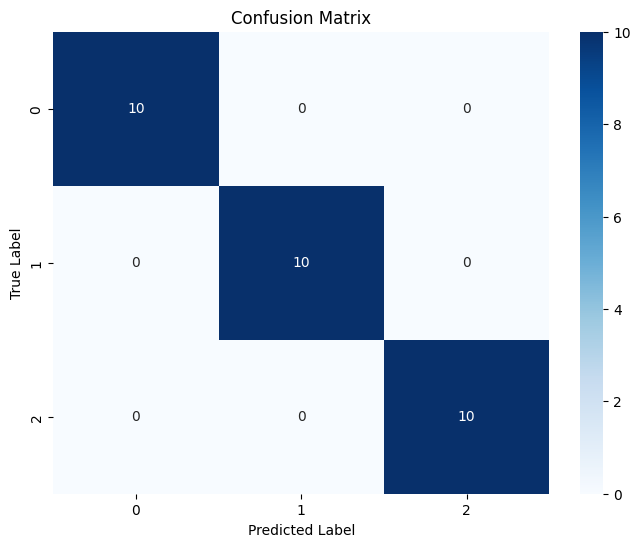

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        10
     Class 1       1.00      1.00      1.00        10
     Class 2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



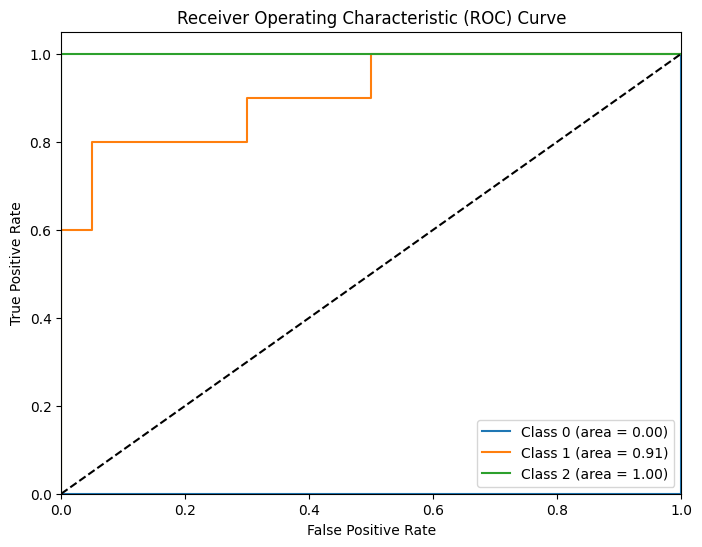

In [1725]:
# Predict on test data
predictions = model_quant.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.sum(y_true == y_pred) / len(y_true) * 100
fully_quantized_model_acc = accuracy
print("Accuracy of the dataset: {:.2f}%".format(accuracy))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=[f'Class {i}' for i in range(3)])
print("Classification Report:\n", report)

# ROC Curve and AUC
# Binarize the output for ROC curve
y_test_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_prob = predictions  # Probability predictions

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Summary

In [1726]:
print("Accuracy of normal model: {:.2f}%".format(normal_model_acc))
print("Accuracy of the weight quantized model: {:.2f}%".format(quantizde_weights_model_acc))
print("Accuracy of the fully quantized model: {:.2f}%".format(fully_quantized_model_acc))

Accuracy of normal model: 100.00%
Accuracy of the weight quantized model: 100.00%
Accuracy of the fully quantized model: 100.00%
